In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prepare_data.public_data_filtering import *
from visualize import save_paper_things as save_paper_things 

%load_ext autoreload
%autoreload 2
from generic.latexify import *
import seaborn as sns

# raw reports summary stats

In [2]:
dfreports = create_dfreports_public()

# incidents in FSR, before filtering 442981
SR-I merge length 617434
done merging SR-I-WO
done merging SR-I-WO-RA


In [10]:
dfreports = dfreports.drop_duplicates(subset = "SRID", keep = "first")

In [11]:
dfreports.loc[:,'Total'] = 1
grouped = save_paper_things.generate_summary_table_from_raw_df(dfreports, groupby = 'Total')

   Total  Requests  Inspected Requests  Fraction Inspected  Unique Incidents  \
0      1    569340              363676                0.64            246744   

   Avg Reports/Incident  Median Time to Inspection (Days)  
0                  1.47                              7.18  
\begin{tabular}{rrrrrrr}
\toprule
 Total &  Requests &  Inspected Requests &  Fraction Inspected &  Unique Incidents &  Avg Reports/Incident &  Median Time to Inspection (Days) \\
\midrule
     1 &    569340 &              363676 &                0.64 &            246744 &                  1.47 &                              7.18 \\
\bottomrule
\end{tabular}



In [12]:
dfreports.SRCreatedDate.agg([min, max])

min   2015-02-28 14:03:49
max   2022-09-01 02:05:31
Name: SRCreatedDate, dtype: datetime64[ns]

In [13]:
save_paper_things.generate_summary_table_from_raw_df(dfreports, groupby = 'BoroughCode')

     BoroughCode  Requests  Inspected Requests  Fraction Inspected  \
0         Queens    235363              152985                0.65   
1       Brooklyn    176030              118782                0.67   
2  Staten Island     69436               35415                0.51   
3          Bronx     54839               38336                0.70   
4      Manhattan     33659               18156                0.54   

   Unique Incidents  Avg Reports/Incident  Median Time to Inspection (Days)  
0            107524                  1.42                              6.59  
1             73067                  1.63                              9.72  
2             25710                  1.38                              6.14  
3             26110                  1.47                              8.95  
4             14346                  1.27                              3.70  
\begin{tabular}{lrrrrrr}
\toprule
  BoroughCode &  Requests &  Inspected Requests &  Fraction Inspected &  Uniq

,BoroughCode,Requests,Inspected Requests,Fraction Inspected,Unique Incidents,Avg Reports/Incident,Median Time to Inspection (Days)
0,Queens,235363,152985,0.65,107524,1.42,6.59
1,Brooklyn,176030,118782,0.67,73067,1.63,9.72
2,Staten Island,69436,35415,0.51,25710,1.38,6.14
3,Bronx,54839,38336,0.70,26110,1.47,8.95
4,Manhattan,33659,18156,0.54,14346,1.27,3.70


In [5]:
save_paper_things.generate_summary_table_from_raw_df(dfreports, groupby = 'SRCategory')

              Category  Requests  Inspected Requests  Fraction Inspected  \
0               Hazard    256699              199583                0.78   
1                Prune    131220               49424                0.38   
2          Remove Tree    119773               96992                0.81   
3  Root/Sewer/Sidewalk     74282               43219                0.58   
4  Illegal Tree Damage     29274               17349                0.59   
5                Other      1766                 783                0.44   

   Unique Incidents  Avg Reports/Incident  Median Time to Inspection (Days)  
0            118135                  1.69                              3.41  
1             34305                  1.44                             19.73  
2             63422                  1.53                              7.91  
3             33450                  1.29                             38.70  
4             12447                  1.39                             18.71  

,Category,Requests,Inspected Requests,Fraction Inspected,Unique Incidents,Avg Reports/Incident,Median Time to Inspection (Days)
0,Hazard,256699,199583,0.78,118135,1.69,3.41
1,Prune,131220,49424,0.38,34305,1.44,19.73
2,Remove Tree,119773,96992,0.81,63422,1.53,7.91
3,Root/Sewer/Sidewalk,74282,43219,0.58,33450,1.29,38.70
4,Illegal Tree Damage,29274,17349,0.59,12447,1.39,18.71
5,Other,1766,783,0.44,645,1.21,9.47


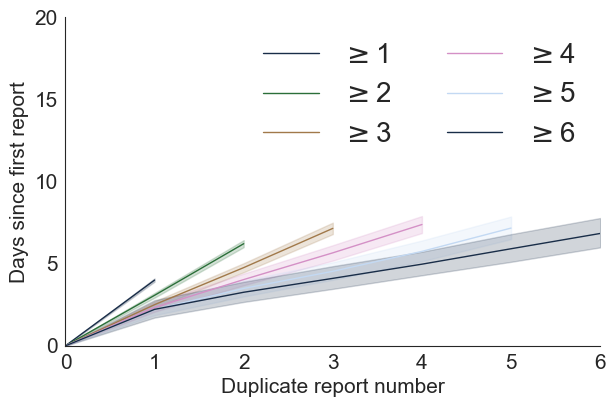

In [6]:
from generic.latexify import *

dfreports['SRCreatedDate'] = pd.to_datetime(dfreports['SRCreatedDate'])
dfreports['InspectionDate'] = pd.to_datetime(dfreports['InspectionDate'])
dfreports['InsClosedDate'] = pd.to_datetime(dfreports['InsClosedDate'])
dfreports['Created to INSP'] = (dfreports['InspectionDate'] - dfreports['SRCreatedDate']).dt.total_seconds()/3600/24
dfinspected = dfreports.dropna(subset = ['IncidentGlobalID'])
dfinspected.loc[:,"Complaint_number"] = dfinspected.groupby("IncidentGlobalID")["SRCreatedDate"].rank(method="first", ascending=True)

first_complaint_time = dfinspected.groupby("IncidentGlobalID")["SRCreatedDate"].min().reset_index()
first_complaint_time = first_complaint_time.rename(columns = {"SRCreatedDate" : 'First_complaint_date'})

first_inspection_time = dfinspected.groupby("IncidentGlobalID")["InspectionDate"].min().reset_index()
first_inspection_time = first_inspection_time.rename(columns = {"InspectionDate" : 'First_inspection_date'})

dfinspected = dfinspected.merge(first_complaint_time, on = 'IncidentGlobalID', how = 'left')
dfinspected = dfinspected.merge(first_inspection_time, on = 'IncidentGlobalID', how = 'left')
dfinspected['Days_since_first_complaint'] = (dfinspected['SRCreatedDate'] - dfinspected.First_complaint_date).dt.total_seconds()/3600/24
dfinspected = dfinspected.query('(SRCreatedDate < First_inspection_date) and Days_since_first_complaint <= 100') #just look up until first inspection for that incident

dfinspected.loc[:,'Days_until_inspection'] = (dfinspected['First_inspection_date'] - dfinspected['First_complaint_date']).dt.total_seconds()/3600/24
number_complaints = dfinspected.groupby("IncidentGlobalID")[["Complaint_number", "Days_until_inspection"]].max().reset_index()
dfinspected.loc[:,'Duplicate_num'] = dfinspected.Complaint_number - 1

from generic.latexify import *
for minnumbercomplaints in range(2, 8, 1):
    valid = list(number_complaints.query('Complaint_number>=@minnumbercomplaints').IncidentGlobalID)
    sns.lineplot(x = 'Duplicate_num', y = 'Days_since_first_complaint', data = dfinspected[dfinspected.IncidentGlobalID.isin(valid)].query('Complaint_number<=@minnumbercomplaints'), label = '$\geq$' + str(minnumbercomplaints - 1) + '')
plt.xlim((0, minnumbercomplaints - 1))
    # plt.ylim((0, 400))
plt.ylim((0, 20))
plt.legend(frameon = False, ncol = 2)
sns.despine()
plt.ylabel('Days since first report', fontsize = 15)
plt.xlabel('Duplicate report number', fontsize = 15)
saveimage('days_since_first_complaint', extension= 'png', close= False)
plt.show()

# aggdf summary stats

In [26]:
_, aggdf = public_data_pipeline_with_settings(settings = default_settings)

data_clean/aggdf_max100_samp-1.csv already exists
min, max log density 4.027974299109586 13.088463894692024
min, max log income 9.370586721118281 13.484574369113451
# incidents, after merging with census demographics and dropping negative density and income 183105


In [20]:
aggdf.loc[:,'Total'] = 1
aggdf.groupby('Total').agg({'NumberReports': 'sum', 'IncidentGlobalID': 'nunique', 'Duration': 'median'}).sort_values(ascending=False, by = 'NumberReports').rename(columns = {'NumberReports': 'Total Requests', 'IncidentGlobalID': 'Total Unique Incidents', 'Duration': 'Median Duration (Days)'})

,Total Requests,Total Unique Incidents,Median Duration (Days)
Total,,,
1,262698,214331,7.036424


In [21]:
aggdf.groupby('Borough').agg({'NumberReports': 'sum', 'IncidentGlobalID': 'nunique', 'Duration': 'median'}).sort_values(ascending=False, by = 'NumberReports').rename(columns = {'NumberReports': 'Total Requests', 'IncidentGlobalID': 'Total Unique Incidents', 'Duration': 'Median Duration (Days)'})


,Total Requests,Total Unique Incidents,Median Duration (Days)
Borough,,,
Queens,112186,93148,6.500000
Brooklyn,82304,63134,9.442743
Bronx,28412,23433,8.837303
Staten Island,25722,22327,6.104757
Manhattan,14072,12287,3.624907


In [22]:
aggdf.groupby('Category').agg({'NumberReports': 'sum', 'IncidentGlobalID': 'nunique', 'Duration': 'median'}).sort_values(ascending=False, by = 'NumberReports').rename(columns = {'NumberReports': 'Total Requests', 'IncidentGlobalID': 'Total Unique Incidents', 'Duration': 'Median Duration (Days)'})

,Total Requests,Total Unique Incidents,Median Duration (Days)
Category,,,
Hazard,122660,91322,2.981962
Remove Tree,61700,54173,7.875868
Prune,33384,28297,18.848530
Root/Sewer/Sidewalk,32482,30398,35.948895
Illegal Tree Damage,12272,10032,18.677894
Remove Debris,200,109,11.886944


In [23]:
sns.histplot(aggdf.NumberDuplicates, bins = range(0, (aggdf.NumberDuplicates).max()+1))
plt.xlabel('Number of reports in observation period')
plt.ylabel('Incident count')
plt.yscale('log')
# plt.show()
saveimage('NumberReports_hist_public', extension = 'png', folder = 'plots/')

In [24]:
sns.histplot(aggdf.Duration, bins = 20)
plt.xlabel('Observation period length (Days)')
plt.ylabel('Incident count')
plt.yscale('log')
# plt.show()
saveimage('Duration_hist_public', extension = 'png', folder = 'plots/')

# paper plots and tables

In [2]:
import visualize.save_paper_things as spt
import pandas as pd
import os
dir_savefiles = 'stan_output/'
dir_plotoutput = 'plots/'

## basic table

In [32]:
for duration in ['100', '30', '200']:
    filename = ('prettysumdf_basic_zeroinflated_1115nycbasic{}').format(duration)
    print(filename)
    prettydf = pd.read_csv('{}{}.csv'.format(dir_savefiles, filename))

    prettydf.head()
    prettydf = prettydf.round(3)
    prettydf.R_hat = prettydf.R_hat.apply(lambda x: round(x, 1))
    if "logTPDBH" in prettydf.name.to_list():
        prettydf.name = prettydf.name.apply(lambda x: x.replace("logTPDBH", "Log(Tree Diameter at Breast Height)"))
    # prettydf.head()
    prettydf.set_index('name', inplace=True)
    prettydf.index.name = None
    prettydf=prettydf[['Mean','StdDev','5%', '50%', '95%', 'R_hat']]
    prettydf.head()
    caption = 'Regression coefficients for Base variables in NYC, for Max Duration {} days, estimated with public data'.format(duration)
    prettydf.to_latex(os.path.join(dir_plotoutput, 'nyc_basic_public_{}.tex'.format(duration)), index = True, caption = caption, label = 'tab:nycbasicpublic{}'.format(duration))

prettysumdf_basic_zeroinflated_1115nycbasic100
prettysumdf_basic_zeroinflated_1115nycbasic30
prettysumdf_basic_zeroinflated_1115nycbasic200


## demographic table

In [3]:
census_variables = [ 'med_age',
       'frac_hispanic',
       'frac_white', 'frac_black'
     , 'frac_noHSGrad', 'frac_collegegrad', 'frac_poverty',
        'frac_renter', 'frac_single_unit',
       'loghouseholdincome', 'logdensity']
pretty_col_names = {
    'med_age': 'Median Age', 
    'frac_hispanic': 'Fraction Hispanic', 
    'frac_white': 'Fraction white', 
    'frac_black': 'Fraction Black', 
    'frac_noHSGrad': 'Fraction noHSGrad', 
    'frac_collegegrad': 'Fraction college grad', 
    'frac_poverty': 'Fraction poverty', 
    'frac_renter': 'Fraction renter', 
    'frac_single_unit': 'Fraction single unit', 
    'loghouseholdincome': 'Log(Avg income)', 
    'logdensity': 'Log(Density)', 
}

In [4]:
dictt = {
    '': [],
    'Mean': [],
    'StdDev': [],
    '5%': [],
    '50%': [],
    '95%': [],
}
for cenvar in census_variables:
    try:
        # covnameloc = covname.format(cenvar)
        filename = ('prettysumdf_basic_zeroinflated_noborough_1207dem_{}').format(cenvar)
        # print(filename)
        prettydf = pd.read_csv('{}{}.csv'.format(dir_savefiles, filename))
        # print(list(prettydf.name))
        row = prettydf.query('name == @cenvar').iloc[0]
        print(cenvar, row['50%'], '({},{})'.format(row['5%'], row['95%']))
        dictt[''].append(pretty_col_names.get(cenvar, cenvar))
        dictt['Mean'].append(row['Mean'])
        dictt['StdDev'].append(row['StdDev'])
        dictt['5%'].append(row['5%'])
        dictt['95%'].append(row['95%'])
        dictt['50%'].append(row['50%'])
    except Exception as e:
        # print(e)
        print(e, 'failed on {}'.format(cenvar))

unidf = pd.DataFrame(dictt)
unidf = unidf.round(3)
unidf

med_age -0.0144837 (-0.0277992,-0.00110425)
frac_hispanic 0.0610567 (0.0470628,0.0751743)
frac_white 0.0545407 (0.039624,0.0677473)
frac_black -0.0579491 (-0.0705865,-0.0446762)
frac_noHSGrad -0.0284959 (-0.0424168,-0.0133581)
frac_collegegrad 0.0364245 (0.0239609,0.0503718)
frac_poverty -0.0281419 (-0.0404276,-0.0146223)
frac_renter 0.0187576 (0.00263918,0.0332237)
frac_single_unit -0.0142242 (-0.0306292,0.000300554)
loghouseholdincome 0.0290973 (0.0159291,0.0415078)
logdensity 0.0503194 (0.034775,0.0655704)


,,Mean,StdDev,5%,50%,95%
0,Median Age,-0.014,0.008,-0.028,-0.014,-0.001
1,Fraction Hispanic,0.061,0.008,0.047,0.061,0.075
2,Fraction white,0.054,0.008,0.040,0.055,0.068
3,Fraction Black,-0.058,0.008,-0.071,-0.058,-0.045
4,Fraction noHSGrad,-0.028,0.009,-0.042,-0.028,-0.013
5,Fraction college grad,0.037,0.008,0.024,0.036,0.050
6,Fraction poverty,-0.028,0.008,-0.040,-0.028,-0.015
7,Fraction renter,0.018,0.010,0.003,0.019,0.033
8,Fraction single unit,-0.015,0.009,-0.031,-0.014,0.000
9,Log(Avg income),0.029,0.008,0.016,0.029,0.042


In [8]:
caption = 'Census Tract Demographic coefficients'
unidf.to_latex(os.path.join(dir_plotoutput, 'demoplot_unicoefsequity_full_nycpublic.tex'), index = False, caption = caption, label = "tab:nycdemopublic")

/var/folders/b5/k83788ts3wq6x9j771jlp4b00000gn/T/ipykernel_44716/2050242834.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  unidf.to_latex(os.path.join(dir_plotoutput, 'demoplot_unicoefsequity_full_nycpublic.tex'), index = False, caption = caption, label = "tab:nycdemopublic")


## spatial plot

In [5]:
spatial_filename = "prettysumdf_tract_adjacency_zeroinflated_moresmooth_1103nycsp"
prettysumdf = pd.read_csv('{}{}.csv'.format(dir_savefiles, spatial_filename))

In [6]:
centolambda = prettysumdf[prettysumdf.name.str.contains('census_tract')][['name', '50%']]
centolambda.loc[:,'census_tract'] = centolambda.loc[:,'name'].str.replace("census_tract",'').str.strip('[]')
centolambda = centolambda.rename(columns = {'50%': 'census_tract_coefficient'})
centolambda = centolambda.drop(columns = ['name'])
centolambda.describe()

,census_tract_coefficient
count,2120.000000
mean,0.000645
std,0.257047
min,-0.853431
25%,-0.186851
50%,0.008470
75%,0.179620
max,0.815476


(array([  1.,   1.,   9.,  23.,  59., 102., 149., 187., 200., 255., 235.,
        273., 242., 159., 102.,  65.,  27.,  20.,   5.,   6.]),
 array([-0.853431  , -0.76998565, -0.6865403 , -0.60309495, -0.5196496 ,
        -0.43620425, -0.3527589 , -0.26931355, -0.1858682 , -0.10242285,
        -0.0189775 ,  0.06446785,  0.1479132 ,  0.23135855,  0.3148039 ,
         0.39824925,  0.4816946 ,  0.56513995,  0.6485853 ,  0.73203065,
         0.815476  ]),
 <BarContainer object of 20 artists>)

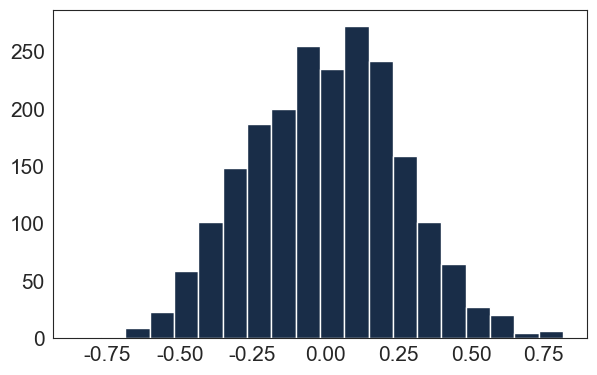

In [7]:
plt.hist(centolambda.census_tract_coefficient, bins = 20)

In [16]:
centolambda.shape

(2120, 2)

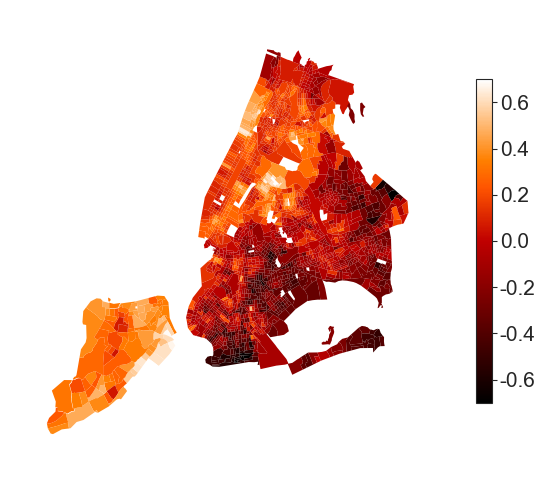

In [19]:
from visualize import visualization
from generic.latexify import *
visualization.plot_map_of_colors(centolambda, tract_col="census_tract",hue_col="census_tract_coefficient", vmin = -.7, vmax = .7)
saveimage('{}_censusmap'.format('adjacencysmooth'), fig=plt, extension="eps", folder="plots/", close=False, despineandgrid = False)

## temporal plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


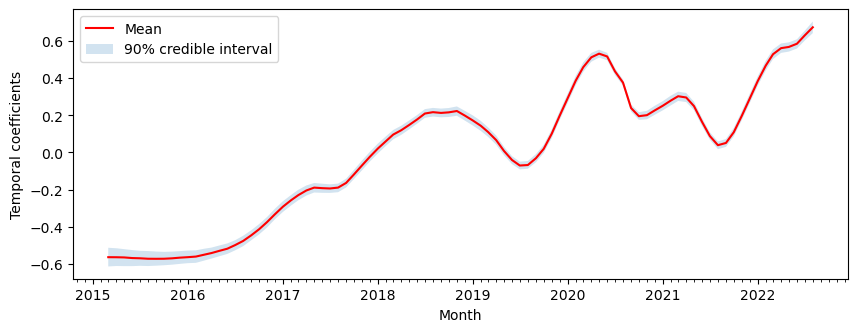

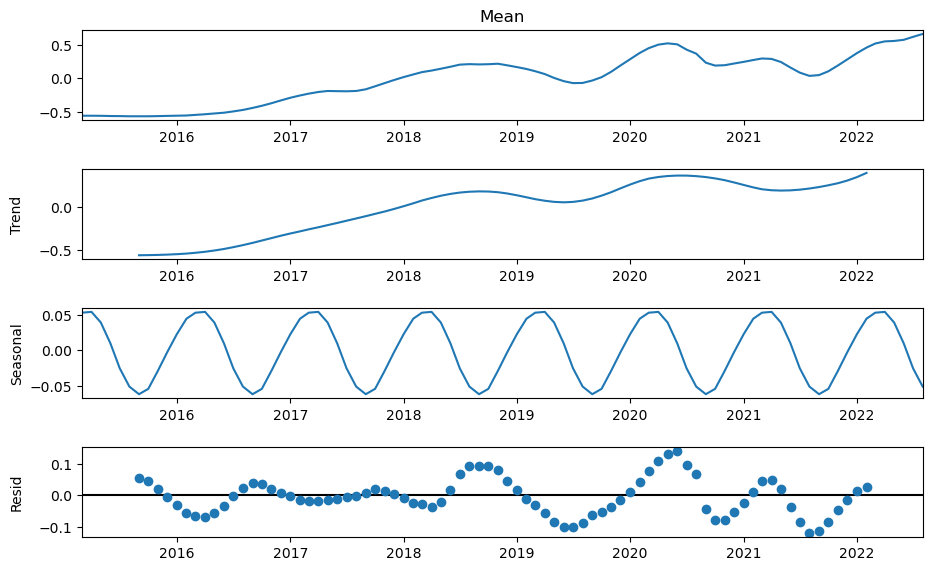

In [4]:
modelname = 'temporal'
prettysumdf_filename = "stan_output/{}.csv".format(modelname)
import pandas as pd
import matplotlib.pyplot as plt
sumdf = pd.read_csv(prettysumdf_filename)

temp = sumdf.loc[sumdf.name.str.contains('CreatedDate'),['name','Mean', '5%', '95%']]
temp.loc[:, 'name'] = temp.loc[:, 'name'].apply(lambda x: x.split('[')[1].split(']')[0])
temp.loc[:, 'Month'] = pd.to_datetime(temp.name).dt.to_period('M')
temp.to_csv('temporal_results.csv', index=False)

plotdf = pd.read_csv('temporal_results.csv', index_col='Month', parse_dates = True)

import seaborn as sns
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y') #This is a format. Will be clear in Screenshot
fig, axes = plt.subplots(figsize=(10, 3.5))
sns.lineplot(data = plotdf['Mean'], label='Mean', color = 'red')

axes.xaxis.set_major_locator(years)
axes.xaxis.set_major_formatter(years_fmt)
axes.xaxis.set_minor_locator(months)


plt.fill_between(plotdf.index, plotdf['5%'], plotdf['95%'], alpha=0.2, label='90% credible interval')

plt.ylabel('Temporal coefficients')
plt.legend()
# plt.xticks(rotation = 90)
plt.savefig('plots/nyc_seasonal_line.eps', format='eps',bbox_inches='tight')
plt.show()
from statsmodels.tsa.seasonal import seasonal_decompose
analysis_df = pd.read_csv('temporal_results.csv', index_col='Month', parse_dates = True)
analysis_df = analysis_df['Mean']
decompose_result_mult = seasonal_decompose(analysis_df, model="additive", period=12)
fig = decompose_result_mult.plot()
fig.set_size_inches(10, 6)
fig.align_labels()
plt.show()
fig.savefig('plots/nyc_seasonal_decomp.eps', format='eps',bbox_inches='tight')

# comparison of public dataset and private dataset

In [8]:
import prepare_data.raw_data_joining as raw_data_joining
import prepare_data.agg_df_creating as agg_df_creating
from pipeline import *
import seaborn as sns

aggdf_private = pipeline_with_aggdf(settings_name='dur100_repmedium', remove_low_categories=True)

Unique incidents in raw data:  109793
Number Unique reports before removing reports after incident death:  147543
Number Unique reports after removing reports after incident death:  121038
Getting overlap set
Unique incidents at end in aggdf:  102949
finalizing aggdf, unique incidents starting:  102949
unique incidents after removing low categories:  102447
unique incidents after removing big trees:  99534
unique incidents after removing short duration:  98138
unique incidents after removing ngative log density:  88355


In [27]:
aggdf_public = aggdf.copy()
aggdf_public.loc[:, 'SRCreatedDate'] = aggdf_public.SRCreatedDate.astype('datetime64[ns]')

In [28]:
aggdf_private.SRCreatedDate.apply(['min','max'])

min   2017-06-30 00:02:43
max   2020-06-30 21:19:00
Name: SRCreatedDate, dtype: datetime64[ns]

In [29]:
public_query = aggdf_public.query('SRCreatedDate>=@aggdf_private.SRCreatedDate.min() and SRCreatedDate<=@aggdf_private.SRCreatedDate.max()')

In [30]:
by_cat = aggdf_private.groupby('Category').IncidentGlobalID.count().reset_index().rename(columns = {'IncidentGlobalID': 'count'})
by_cat.loc[:, 'Data'] = 'private'
by_cat = by_cat.append(aggdf_private.groupby('Category').NumberReports.sum().reset_index().rename(columns = {'NumberReports': 'count'}).assign(Data='private_reports'))
by_cat = by_cat.append(public_query.groupby('Category').IncidentGlobalID.count().reset_index().rename(columns = {'IncidentGlobalID': 'count'}).assign(Data='public'))
by_cat = by_cat.append(public_query.groupby('Category').NumberReports.sum().reset_index().rename(columns = {'NumberReports': 'count'}).assign(Data='public_reports'))

<AxesSubplot:xlabel='Category', ylabel='count'>

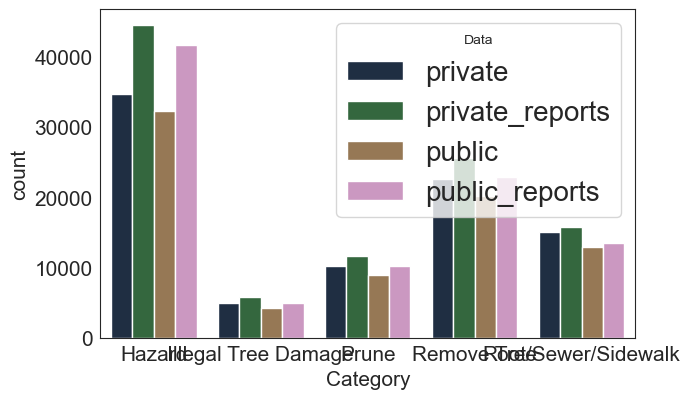

In [31]:
sns.barplot(x='Category', y='count', hue='Data', data=by_cat)

# appendix plots

In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
trees = pd.read_csv('data/TREE_2015.csv') # public tree census data at https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/pi5s-9p35
shape = gpd.read_file("visualize/viz_data/nycb2020.shp") 
latlong = shape.to_crs({'init': 'epsg:4326'})
geometry = [Point(xy) for xy in zip(trees.longitude, trees.Latitude)]
crs = {'init' :'epsg:2263'}
gdf = gpd.GeoDataFrame(trees, crs=crs, geometry=geometry)
merged_file = gpd.sjoin(gdf, latlong, how='left', op='within')
merged_file.loc[:,'census_tract'] = merged_file.GEOID.astype(str).str[:11]

In [6]:
import pipeline
import seaborn as sns
import numpy as np
aggdf = pipeline.pipeline_with_aggdf(settings_name='dur100_repmedium')
aggdf.loc[:, 'census_tract'] = aggdf.loc[:, 'census_tract'].astype(str).str[:11]

Unique incidents in raw data:  109793
Number Unique reports before removing reports after incident death:  147543
Number Unique reports after removing reports after incident death:  121038
Getting overlap set
Unique incidents at end in aggdf:  102949
finalizing aggdf, unique incidents starting:  102949
unique incidents after removing low categories:  102447
unique incidents after removing big trees:  99534
unique incidents after removing short duration:  98138
unique incidents after removing ngative log density:  88355


600282


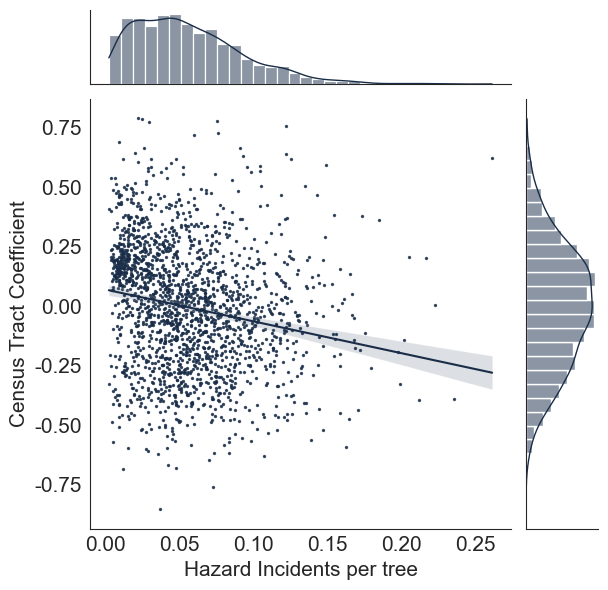

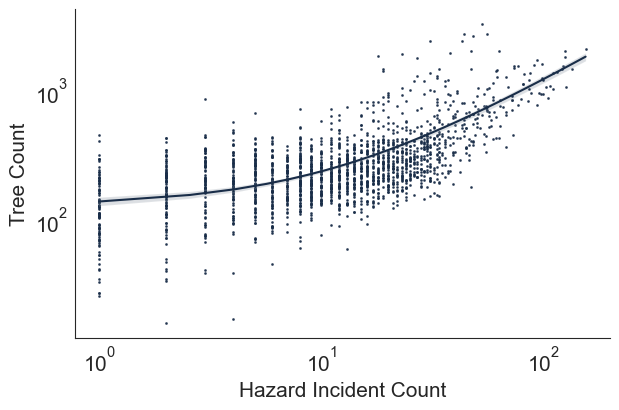

In [7]:
# plot with only hazard
aggdf_haz = aggdf.query("Category == 'Hazard'")
countbytract = aggdf_haz.groupby('census_tract')['IncidentGlobalID'].count().reset_index().rename(columns = {'IncidentGlobalID':'incident_count'})
reportsbytract = aggdf_haz.groupby('census_tract')['NumberReports'].sum().apply(np.log).reset_index()
# tree_by_tracts_filename  = 'data/2015StreetTreesCensus_TREES_to_census_tract.csv'
# dftreecount = pd.read_csv(tree_by_tracts_filename).dropna()
# dftreecount.loc[:,'census_tract'] = dftreecount.loc[:,'census_tract'].astype(str).str[:11]
df_treecount_by_tract = merged_file.groupby('census_tract')['tree_id'].nunique().reset_index().rename(columns={'tree_id':'tree_count'})
combined = pd.merge(countbytract, df_treecount_by_tract, on = 'census_tract').merge(reportsbytract, on = 'census_tract')
combined.loc[:,'incidents_per_tree'] = combined.loc[:,'incident_count'] / combined.loc[:,'tree_count']
combined.loc[:,'log_incidents_per_tree'] = combined.loc[:,'incidents_per_tree'].apply(np.log)
spatial_filename = "prettysumdf_tract_adjacency_zeroinflated_moresmooth_1103nycsp"
prettysumdf = pd.read_csv('{}{}.csv'.format('stan_output/', spatial_filename))
centolambda = prettysumdf[prettysumdf.name.str.contains('census_tract')][['name', '50%']]
centolambda.loc[:,'census_tract'] = centolambda.loc[:,'name'].str.replace("census_tract",'').str.strip('[]')
centolambda = centolambda.rename(columns = {'50%': 'census_tract_coefficient'})
centolambda = centolambda.drop(columns = ['name'])
centolambda.describe()
combined = combined.merge(centolambda, on = 'census_tract')
print(combined.tree_count.sum())
combined
h = sns.jointplot(x = 'incidents_per_tree', y = 'census_tract_coefficient', data = combined.query('tree_count>2'), kind = 'reg', scatter_kws={'s':2})
h.ax_joint.set_xlabel('Hazard Incidents per tree')
h.ax_joint.set_ylabel('Census Tract Coefficient')
saveimage('incidents_per_tree_vs_coefficient_hazard', fig=plt, extension="png", folder="plots/", close=False, despineandgrid = True)
plt.show()

# sns.regplot(x = 'log_incidents_per_tree', y = 'census_tract_coefficient', data = combined.query('tree_count>10'))
# plt.show()

sns.regplot(x = 'incident_count', y = 'tree_count', data = combined)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Hazard Incident Count')
plt.ylabel('Tree Count')
saveimage('incidents_vs_tree_count_hazard', fig=plt, extension="png", folder="plots/", close=False, despineandgrid = True)
plt.show()

609261


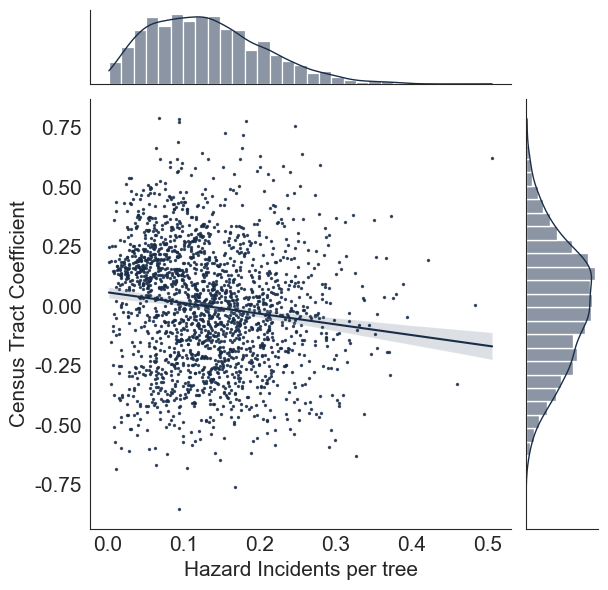

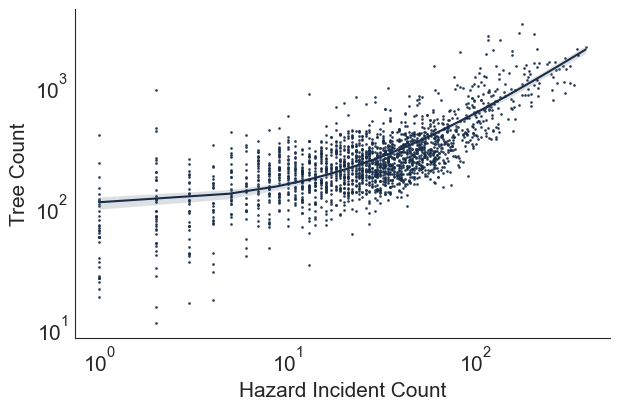

In [8]:
# plot with all reports
countbytract = aggdf.groupby('census_tract')['IncidentGlobalID'].count().reset_index().rename(columns = {'IncidentGlobalID':'incident_count'})
reportsbytract = aggdf.groupby('census_tract')['NumberReports'].sum().apply(np.log).reset_index()
# tree_by_tracts_filename  = 'data/2015StreetTreesCensus_TREES_to_census_tract.csv'
# dftreecount = pd.read_csv(tree_by_tracts_filename).dropna()
# dftreecount.loc[:,'census_tract'] = dftreecount.loc[:,'census_tract'].astype(str).str[:11]
df_treecount_by_tract = merged_file.groupby('census_tract')['tree_id'].nunique().reset_index().rename(columns={'tree_id':'tree_count'})
combined = pd.merge(countbytract, df_treecount_by_tract, on = 'census_tract').merge(reportsbytract, on = 'census_tract')
combined.loc[:,'incidents_per_tree'] = combined.loc[:,'incident_count'] / combined.loc[:,'tree_count']
combined.loc[:,'log_incidents_per_tree'] = combined.loc[:,'incidents_per_tree'].apply(np.log)
spatial_filename = "prettysumdf_tract_adjacency_zeroinflated_moresmooth_1103nycsp"
prettysumdf = pd.read_csv('{}{}.csv'.format('stan_output/', spatial_filename))
centolambda = prettysumdf[prettysumdf.name.str.contains('census_tract')][['name', '50%']]
centolambda.loc[:,'census_tract'] = centolambda.loc[:,'name'].str.replace("census_tract",'').str.strip('[]')
centolambda = centolambda.rename(columns = {'50%': 'census_tract_coefficient'})
centolambda = centolambda.drop(columns = ['name'])
centolambda.describe()
combined = combined.merge(centolambda, on = 'census_tract')
print(combined.tree_count.sum())
combined
h = sns.jointplot(x = 'incidents_per_tree', y = 'census_tract_coefficient', data = combined.query('tree_count>2'), kind = 'reg', scatter_kws={'s':2})
h.ax_joint.set_xlabel('Hazard Incidents per tree')
h.ax_joint.set_ylabel('Census Tract Coefficient')
saveimage('incidents_per_tree_vs_coefficient', fig=plt, extension="png", folder="plots/", close=False, despineandgrid = True)
plt.show()

# sns.regplot(x = 'log_incidents_per_tree', y = 'census_tract_coefficient', data = combined.query('tree_count>10'))
# plt.show()

sns.regplot(x = 'incident_count', y = 'tree_count', data = combined)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Hazard Incident Count')
plt.ylabel('Tree Count')
saveimage('incidents_vs_tree_count', fig=plt, extension="png", folder="plots/", close=False, despineandgrid = True)
plt.show()